In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <font color = 'red'> LOCATION OF ESTIMATES </font>

In [5]:
state = pd.read_csv('state.csv')

In [6]:
from scipy.stats import trim_mean

In [3]:
state.head()

,State,Population,Murder.rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
state['Population'].mean()

6162876.3

In [10]:
trim_mean(state['Population'], 0.1)

4783697.125

In [11]:
import wquantiles

In [14]:
np.average(state['Murder.rate'],weights = state['Population'])


4.445833981123393

In [21]:
wquantiles.median(state['Murder.rate'],weights = state['Population'])

4.4

# <font color = 'red'> ESTIMATES OF VARIABILITY </font>

In [16]:
from statsmodels import robust

In [17]:
## Standard Deviation

state['Population'].std()

6848235.347401142

In [19]:
## Interquartile Range

state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [20]:
## Mean Absolute Deviation

robust.scale.mad(state['Population'])

3849876.1459979336

# <font color = 'red'> EXPLORING THE DATA DISTRIBUTION OR DATA VISUALIZATION </font>

In [22]:
state['Murder.rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.rate, dtype: float64

Text(0, 0.5, 'Population in Millions')

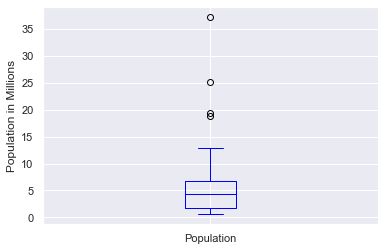

In [27]:
sns.set(style = 'darkgrid')
sns.plot(state['Population'],kind = 'box')
ax = (state['Population']/1_000_000).plot.box(color = 'blue')
ax.set_ylabel('Population in Millions')

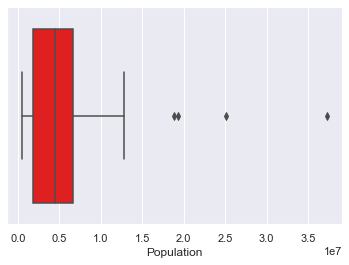

In [32]:
sns.boxplot(state['Population'],color = 'red')

In [33]:
## Frequency Tables and Histograms

binnedPopulation = pd.cut(state['Population'],10)


In [34]:
binnedPopulation

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [35]:
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [36]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

Text(0.5, 0, 'Population in Millions')

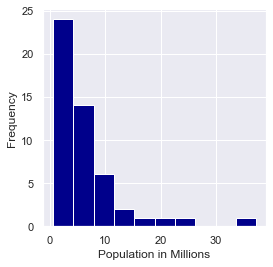

In [51]:
ax = (state['Population']/1_000_000).plot.hist(figsize = (4,4),color = 'darkblue')
ax.set_xlabel('Population in Millions')

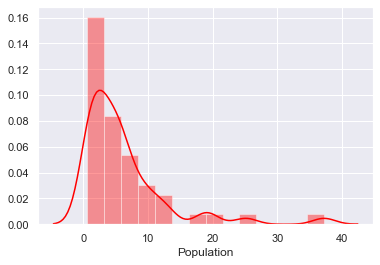

In [39]:
sns.distplot(state['Population']/1_000_000,color = 'red')


In [40]:
import cufflinks as cs
cs.go_offline()

In [47]:
state['Population'].iplot(kind = 'hist',bins = 40,color = 'red')

Text(0.5, 0, 'Murder rate per 1 lak people')

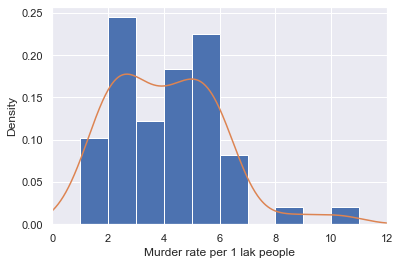

In [52]:
## Histoggram

ax = state['Murder.rate'].plot.hist(density = True, xlim = [0,12],bins = range(1,12))
state['Murder.rate'].plot.density(ax = ax)
ax.set_xlabel('Murder rate per 1 lak people')

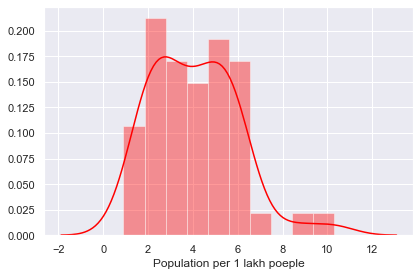

In [63]:
sns.distplot(state['Murder.rate'],bins = 10,color = 'red')
plt.xlabel('Population per 1 lakh poeple')
plt.tight_layout()
plt.show()